#### Data set credit : https://www.kaggle.com/uciml/iris

The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

- Id
- SepalLengthCm
- SepalWidthCm
- PetalLengthCm
- PetalWidthCm
- Species

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
iris_df = pd.read_csv('iris_data.csv')

In [3]:
#Get column names
iris_df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [4]:
#Remove 'id' column as it's not adding any significance in result
iris_df.drop(columns='Id', inplace=True)

In [5]:
#Rename columns
iris_df.rename({'SepalLengthCm' : 'SepalLength', 'SepalWidthCm' : 'SepalWidth', 'PetalLengthCm': 'PetalLength', 'PetalWidthCm' : 'PetalWidth'} , axis=1, inplace=True)

In [6]:
iris_df.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species'], dtype='object')

In [7]:
#number of rows and columns
iris_df.shape

(150, 5)

In [8]:
#Get size of data for each class lable
iris_df.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

##### This is a balanced dataset as each class label is having equal data points

In [9]:
iris_df.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### 2D Pairplots

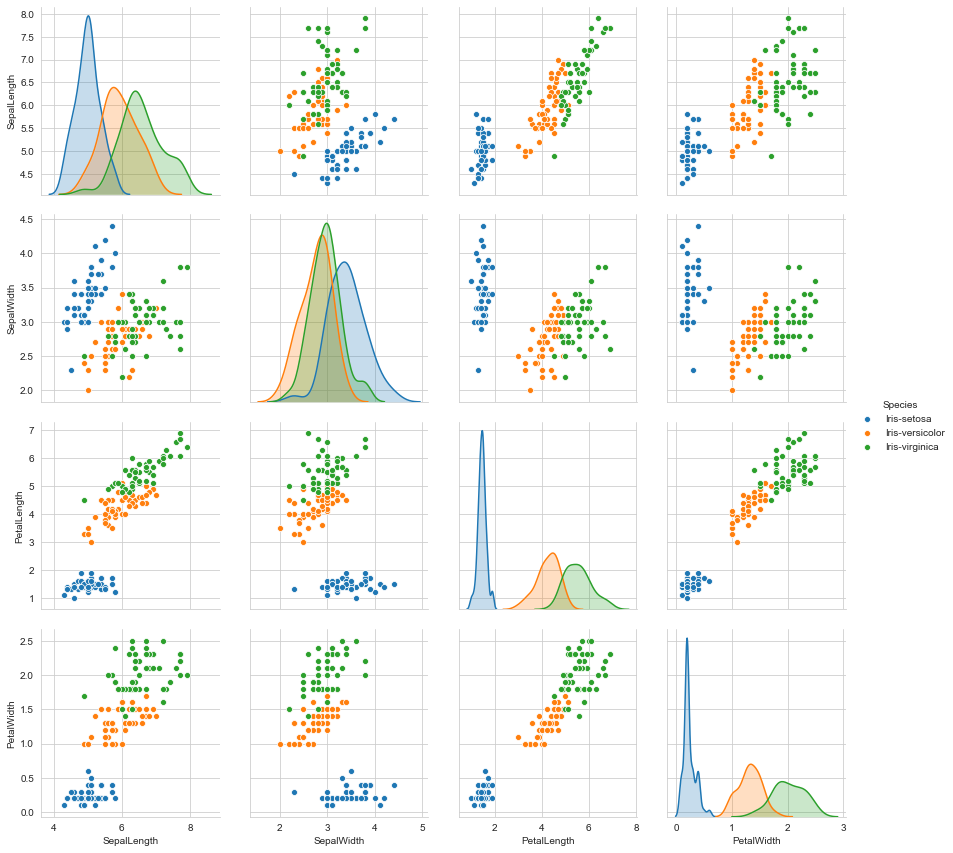

In [10]:
sns.set_style('whitegrid')
sns.pairplot(iris_df, hue='Species', size=3)
plt.show()

###### Observation
- All type of flowers are well separable for PetalLenght and PetalWidth
- Also all type of bit of well separable for PetalWidth and SepalWidth

### Heatmap

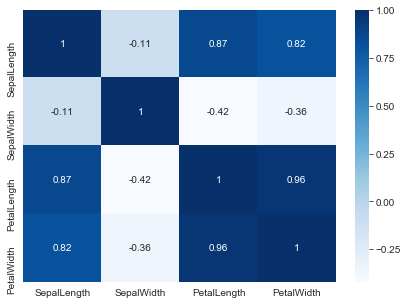

In [11]:
#Heatmap can give correlation between different features
fig = plt.figure(figsize=(7,5))
sns.heatmap(iris_df.corr(), cmap='Blues', annot=True)

##### Observation
- PetalLenght and PetalWith : Corr 0.96 : Having highest correlation
- PetalLenght and SepalLenght : Corr 0.87 : Having second highest correlation
- PetalWidht and SepalLenght : Corr 0.82 : Having fair enough correlation 

### Distplot

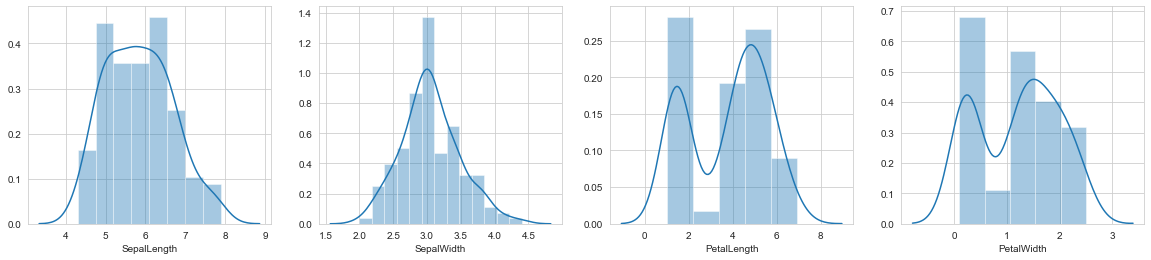

In [12]:
#Distribution plot
columns = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
fig = plt.figure(figsize=(20,4))
i = 1

for col in columns: 
    plt.subplot(1,4, i)
    sns.distplot(iris_df[col])
    i = i + 1

plt.show()

##### Observation
1. SepalLength : Maximum distribution is around 5 to 6
2. SepalWidth : Maximum distribution is around 3
3. PetalLenght : Maximum distribution is around 4.5
4. PetalWidth : Maximum distribution is around 1.5

#### Univariate analysis of features

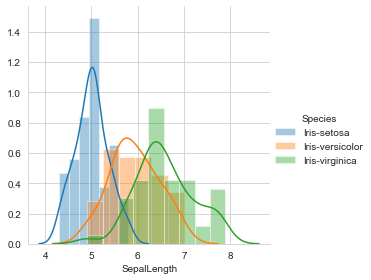

In [13]:
sns.FacetGrid(iris_df, hue='Species', height=4).map(sns.distplot, 'SepalLength').add_legend()

- We can not separate flowers just using SepalLength

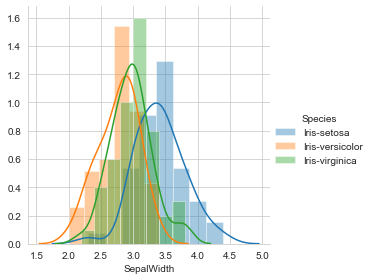

In [14]:
sns.FacetGrid(iris_df, hue='Species', height=4).map(sns.distplot, 'SepalWidth').add_legend()

- We can not separate flowers just using SepalWidth

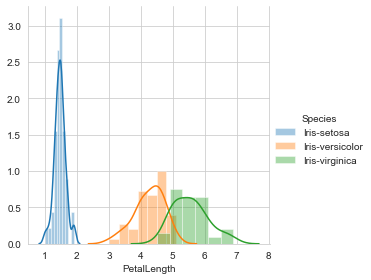

In [15]:
sns.FacetGrid(iris_df, hue='Species', height=4).map(sns.distplot, 'PetalLength').add_legend()

- Just using PetalLength we can separate Iris-setosa flowers easily.
- Also Iris-versicolor and Iris-virginica partially seperated

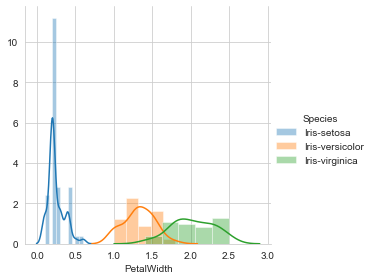

In [16]:
sns.FacetGrid(iris_df, hue='Species', size=4).map(sns.distplot, 'PetalWidth').add_legend()

- We can Iris-setosa is well separable using PetalWidth
- Iris-versicolor and Iris-virginica are partially separable using PetalWidth

### Box plot

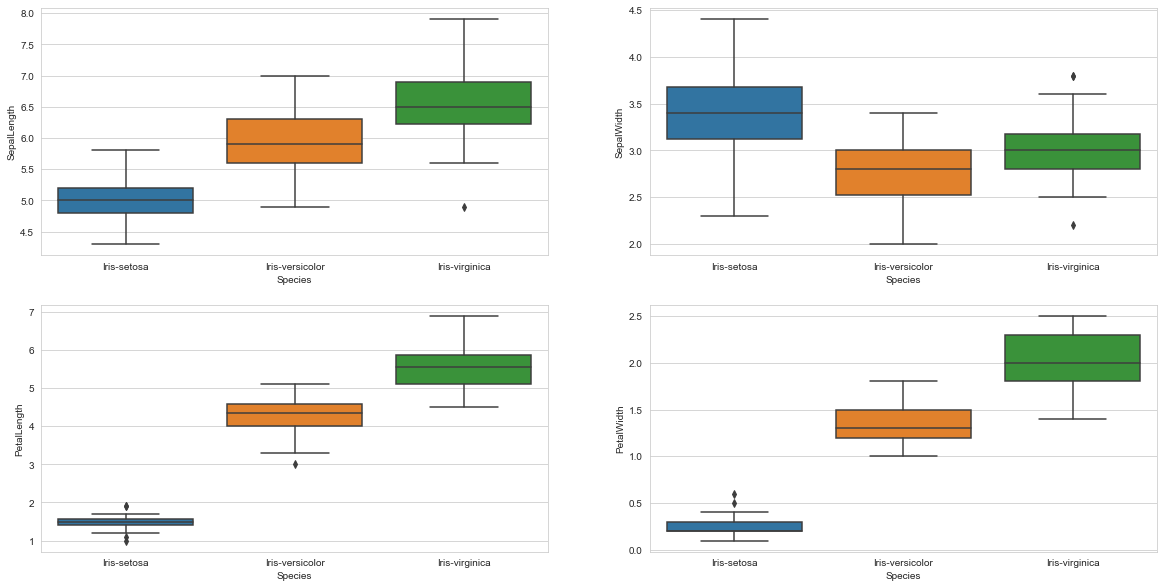

In [17]:
fig, axis = plt.subplots(2, 2, figsize=(20,10))

sns.boxplot(x='Species', y='SepalLength', data=iris_df, ax=axis[0,0])
sns.boxplot(x='Species', y='SepalWidth', data=iris_df, ax=axis[0,1])
sns.boxplot(x='Species', y='PetalLength', data=iris_df, ax=axis[1,0])
sns.boxplot(x='Species', y='PetalWidth', data=iris_df, ax=axis[1,1])

plt.show()

1. Iris-setosa : It's usually having smaller features except SepalWidth
2. Iris-versicolor : It's having average features
3. Iris-virginica : It's having bigger features except SepalWidth

### Violin Plot

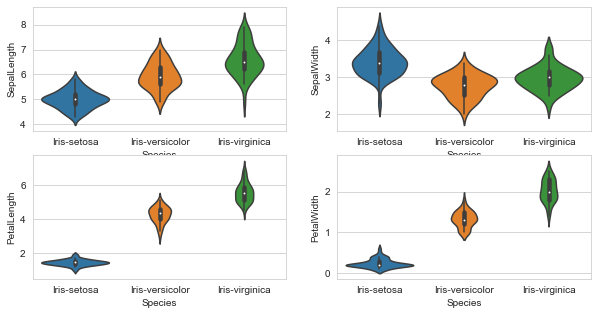

In [18]:
fig, axis = plt.subplots(2,2, figsize=(10, 5))

sns.violinplot(x='Species', y='SepalLength', data=iris_df, ax=axis[0,0])
sns.violinplot(x='Species', y='SepalWidth', data=iris_df, ax=axis[0,1])
sns.violinplot(x='Species', y='PetalLength', data=iris_df, ax=axis[1,0])
sns.violinplot(x='Species', y='PetalWidth', data=iris_df, ax=axis[1,1])

plt.show()

### Conclusion

1. Data is balanced
2. Strong correlation between PetalLenght and PetalWith
3. Iris-Setos is easily separable from other flowers, even using single feature
4. Iris-versicolor and Iris-virginica are difficult to seperate just using single feature